In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
comments=pd.read_csv(r"/media/ignacio/SSD/Studies/Portfolio Projects/Youtube_project_shan_singh/UScomments.csv", encoding='ISO-8859-1',error_bad_lines=False)

/tmp/ipykernel_10232/2222710492.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv(r"/media/ignacio/SSD/UScomments.csv", encoding='ISO-8859-1',error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114463: expected 4 fields, saw 5\n'
b'Skipping line 142495: expected 4 fields, saw 8\nSkipping line 189731: expected 4 fields, saw 6\nSkipping line 245216: expected 4 fields, saw 7\n'
b'Skipping line 388428: expected 4 fields, saw 5\n'
/tmp/ipykernel_10232/2222710492.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r"/media/ignacio/SSD/Studies/Portfolio Projects/Youtube_project_shan_singh/UScomments.csv", encoding='ISO-8859-1',error_bad_lines=False)


In [10]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ð,3,0


In [11]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          1
dtype: int64

In [12]:
comments.dropna(inplace=True)

In [13]:
from textblob import TextBlob

In [14]:
TextBlob("Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸ 	").sentiment.polarity

0.0

In [15]:
polarity=[]
for comment in comments['comment_text']:
    polarity.append(TextBlob(comment).sentiment.polarity)

In [16]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [17]:
comments['polarity']=polarity

In [18]:
comments.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending ð,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though ð­ðð»â¤ï¸,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [19]:
comments_positive=comments[comments['polarity']==1]

In [20]:
comments_negative=comments[comments['polarity']==-1]

In [21]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Wellâ¦ The brain surgeon Ben Carson just prov...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690782                                  Like Kelly she evil
690859                       R U FUCKING KIDDING ME?!?!?!?!
691067             This is horribly offensive please report
691174    Sink holes looks terrifying sinkholes sink you...
691218    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3504, dtype: object

In [28]:
total_comments=' '.join(comments_negative['comment_text'])

In [29]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

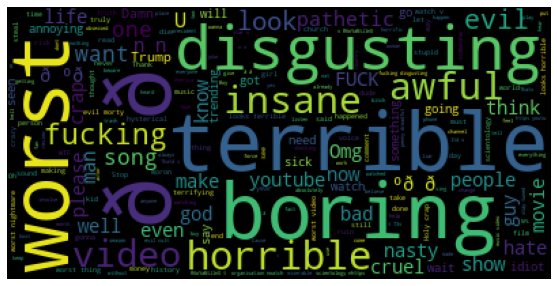

In [30]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [32]:
total_comments2=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

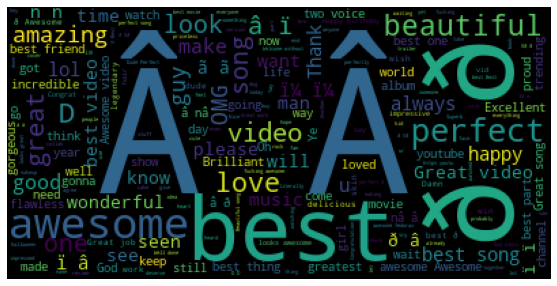

In [33]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')